# Logistic Regression VS Kmeans Clustering

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix
from sklearn.metrics.cluster import completeness_score, homogeneity_score, v_measure_score

## Loading Wine Dataset and creating dataframe


In [3]:
df_wine = pd.read_csv('./wine.data.csv')

features = df_wine.loc[:, df_wine.columns != 'Class']
target = df_wine.Class

target_names = df_wine['Class'].unique()

df_wine.describe()

Class     Alcohol  Malic acid         Ash  Alcalinity of ash  \
count  178.000000  178.000000  178.000000  178.000000         178.000000   
mean     1.938202   13.000618    2.336348    2.366517          19.494944   
std      0.775035    0.811827    1.117146    0.274344           3.339564   
min      1.000000   11.030000    0.740000    1.360000          10.600000   
25%      1.000000   12.362500    1.602500    2.210000          17.200000   
50%      2.000000   13.050000    1.865000    2.360000          19.500000   
75%      3.000000   13.677500    3.082500    2.557500          21.500000   
max      3.000000   14.830000    5.800000    3.230000          30.000000   

        Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000    0.340000              0.130000   
25%     88.000000       1.742500    1.205000              0.270000   
50%     98.000000       2.355000    2.135000              0.340000   
75%    107.000000       2.800000    2.875000              0.437500   
max    162.000000       3.880000    5.080000              0.660000   

       Proanthocyanins  Color intensity         Hue  \
count       178.000000       178.000000  178.000000   
mean          1.590899         5.058090    0.957449   
std           0.572359         2.318286    0.228572   
min           0.410000         1.280000    0.480000   
25%           1.250000         3.220000    0.782500   
50%           1.555000         4.690000    0.965000   
75%           1.950000         6.200000    1.120000   
max           3.580000        13.000000    1.710000   

       OD280/OD315 of diluted wines      Proline  
count                    178.000000   178.000000  
mean                       2.611685   746.893258  
std                        0.709990   314.907474  
min                        1.270000   278.000000  
25%                        1.937500   500.500000  
50%                        2.780000   673.500000  
75%                        3.170000   985.000000  
max                        4.000000  1680.000000

## Visualising how the data is divided between the 3 classes

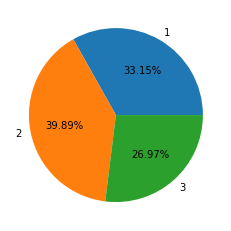

In [4]:
classes = df_wine.groupby('Class')['Class'].count()

plt.pie(classes, labels=target_names, autopct='%.2f%%')
plt.show()

## Standardising the Data

In [5]:
standardized = scale(features)
df_std = pd.DataFrame(standardized, columns=features.columns)
df_std['Class'] = target.copy() 
df_std.describe()

Alcohol    Malic acid           Ash  Alcalinity of ash  \
count  1.780000e+02  1.780000e+02  1.780000e+02       1.780000e+02   
mean  -8.619821e-16 -8.357859e-17 -8.657245e-16      -1.160121e-16   
std    1.002821e+00  1.002821e+00  1.002821e+00       1.002821e+00   
min   -2.434235e+00 -1.432983e+00 -3.679162e+00      -2.671018e+00   
25%   -7.882448e-01 -6.587486e-01 -5.721225e-01      -6.891372e-01   
50%    6.099988e-02 -4.231120e-01 -2.382132e-02       1.518295e-03   
75%    8.361286e-01  6.697929e-01  6.981085e-01       6.020883e-01   
max    2.259772e+00  3.109192e+00  3.156325e+00       3.154511e+00   

          Magnesium  Total phenols    Flavanoids  Nonflavanoid phenols  \
count  1.780000e+02   1.780000e+02  1.780000e+02          1.780000e+02   
mean  -1.995907e-17  -2.972030e-16 -4.016762e-16          4.079134e-16   
std    1.002821e+00   1.002821e+00  1.002821e+00          1.002821e+00   
min   -2.088255e+00  -2.107246e+00 -1.695971e+00         -1.868234e+00   
25%   -8.244151e-01  -8.854682e-01 -8.275393e-01         -7.401412e-01   
50%   -1.222817e-01   9.595986e-02  1.061497e-01         -1.760948e-01   
75%    5.096384e-01   8.089974e-01  8.490851e-01          6.095413e-01   
max    4.371372e+00   2.539515e+00  3.062832e+00          2.402403e+00   

       Proanthocyanins  Color intensity           Hue  \
count     1.780000e+02     1.780000e+02  1.780000e+02   
mean     -1.699639e-16    -1.122697e-17  3.717376e-16   
std       1.002821e+00     1.002821e+00  1.002821e+00   
min      -2.069034e+00    -1.634288e+00 -2.094732e+00   
25%      -5.972835e-01    -7.951025e-01 -7.675624e-01   
50%      -6.289785e-02    -1.592246e-01  3.312687e-02   
75%       6.291754e-01     4.939560e-01  7.131644e-01   
max       3.485073e+00     3.435432e+00  3.301694e+00   

       OD280/OD315 of diluted wines       Proline       Class  
count                  1.780000e+02  1.780000e+02  178.000000  
mean                   2.919013e-16 -7.484650e-18    1.938202  
std                    1.002821e+00  1.002821e+00    0.775035  
min                   -1.895054e+00 -1.493188e+00    1.000000  
25%                   -9.522483e-01 -7.846378e-01    1.000000  
50%                    2.377348e-01 -2.337204e-01    2.000000  
75%                    7.885875e-01  7.582494e-01    3.000000  
max                    1.960915e+00  2.971473e+00    3.000000

### Checking correlation with the TARGET and selecting highly correlated ones.

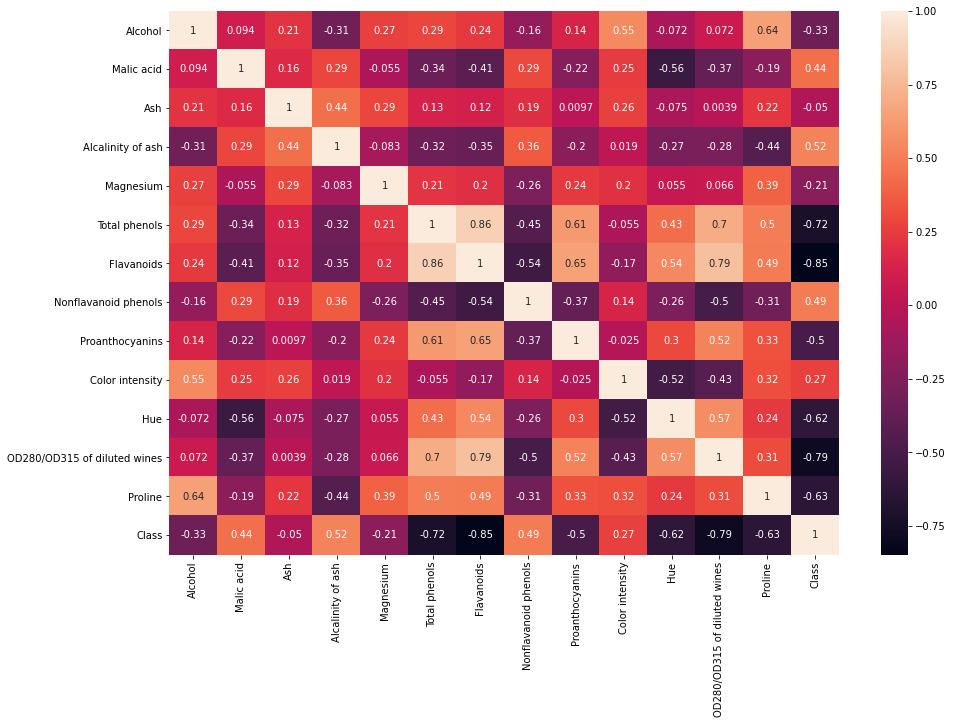

In [6]:
cmat = df_std.corr()
fig, axs = plt.subplots(nrows=1)
fig.set_size_inches(15, 10)
sns.heatmap(cmat, annot=True)
plt.show()

### Checking Multicolinearity between selected columns

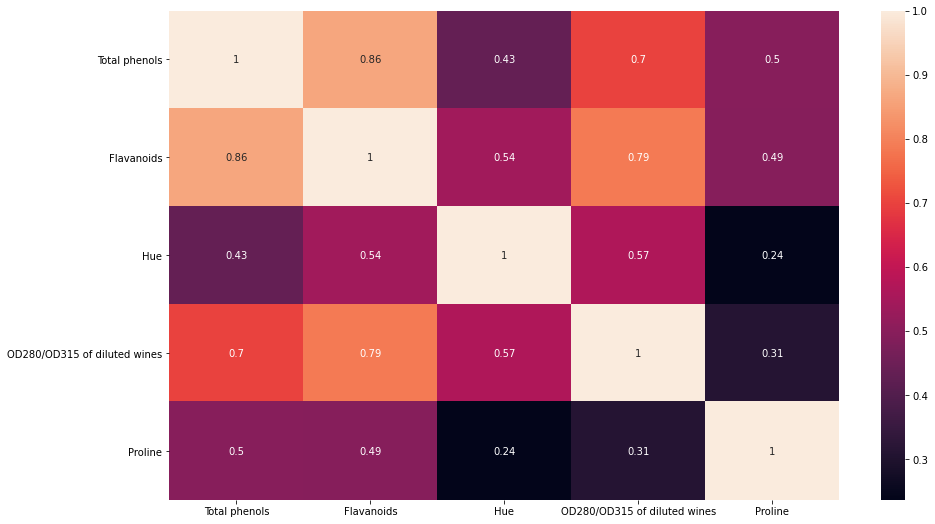

In [7]:
df_intermediate = df_std[['Total phenols', 'Flavanoids', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']]

cmat = df_intermediate.corr()
fig, axs = plt.subplots(nrows=1)
fig.set_size_inches(15, 9)
sns.heatmap(cmat, annot=True)
plt.show()

### Dropping 'total_phenols' column since it is highly correlated with 'flavanoids' and 'od280/od315_of_diluted_wines'

In [8]:
df_final = df_std[['Hue', 'OD280/OD315 of diluted wines', 'Proline', 'Class']]

## Visualisations over the 3 classes for each selected attribute

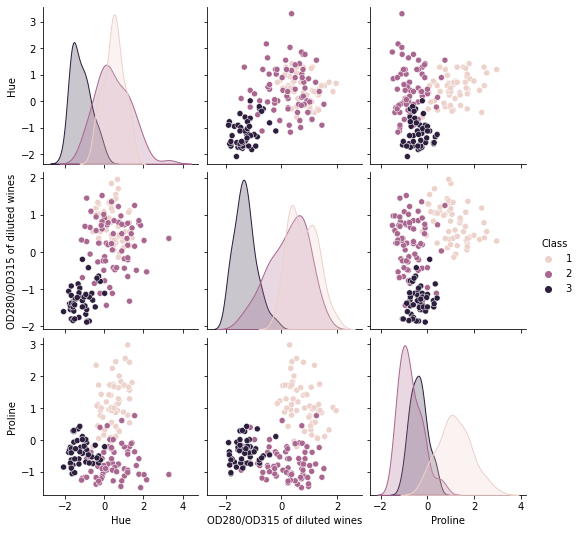

In [9]:
sns.pairplot(df_final, hue='Class')
plt.show()

## Distributions

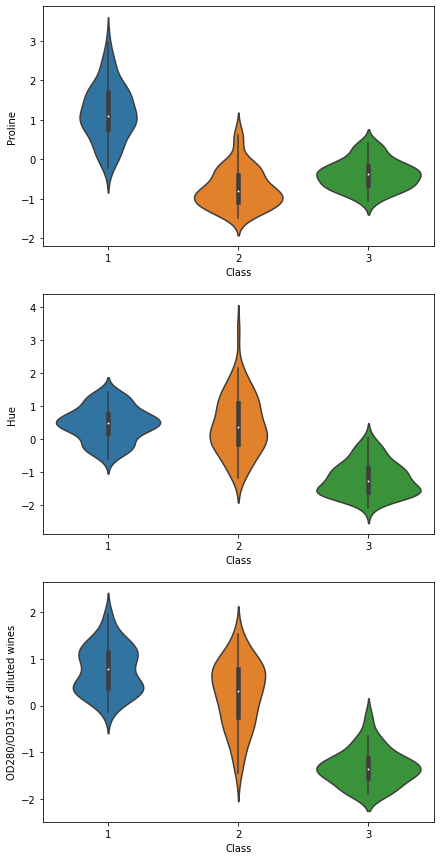

In [10]:
fig, axs = plt.subplots(nrows=3)
fig.set_size_inches(7, 15)

p2 = sns.violinplot(x='Class', y='Hue', data=df_final, ax=axs[1])
p3 = sns.violinplot(x='Class', y='OD280/OD315 of diluted wines', data=df_final, ax=axs[2])
p4 = sns.violinplot(x='Class', y='Proline', data=df_final, ax=axs[0])

## Tain-Test Split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(df_final.loc[:, df_final.columns != 'Class'], df_final['Class'], test_size=0.1, random_state=0)

## Creating and training Logistic Regression Model

In [12]:
model_l = LogisticRegression()
model_l.fit(x_train, y_train)

y_lr = model_l.predict(x_test)

print('Model Coefficient : \n', model_l.coef_)
print('MOdel Intercept : ', model_l.intercept_)

Model Coefficient : 
 [[ 0.11145796  1.41335974  1.92776915]
 [ 1.16969752  0.36312439 -1.78417496]
 [-1.28115548 -1.77648413 -0.1435942 ]]
MOdel Intercept :  [ 0.04744672  0.88420744 -0.93165416]


## Creating and training K-Means Model

### Checking for 10 different value of 'k' to see which gives lower varience

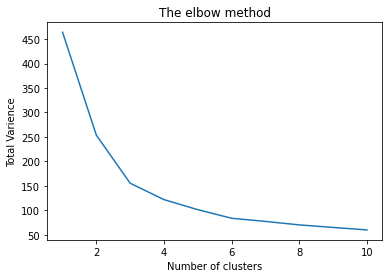

In [13]:
t_var = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x_train)
    t_var.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), t_var)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Total Varience') #within cluster sum of squares
plt.show()

### FInally creating for k=3

In [14]:
model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
model.fit(x_train)

centroids = model.cluster_centers_

y_predicted = model.predict(x_test)
y_predicted = y_predicted + 1

print('Model Labels : \n', model.labels_)
print('\nModel Centers : \n', centroids)

Model Labels : 
 [1 2 0 2 0 0 0 0 0 0 0 1 2 2 1 2 2 2 1 0 0 1 2 2 0 0 0 2 1 2 1 2 1 1 2 1 2
 0 1 1 0 1 1 2 1 1 0 1 1 0 2 0 2 0 0 2 0 2 1 1 0 0 0 1 1 2 1 0 0 0 0 0 2 2
 0 2 1 2 1 2 2 0 2 0 0 2 1 0 2 1 0 0 1 2 1 1 2 2 0 1 2 2 0 0 2 2 2 1 0 2 0
 1 2 0 1 1 2 2 1 2 1 0 2 2 0 2 1 0 1 2 1 1 1 2 0 0 0 0 1 1 0 0 2 0 1 1 2 2
 1 0 1 0 2 2 2 0 0 0 2 1]

Model Centers : 
 [[ 0.47763356  0.31058707 -0.77159254]
 [-1.07167665 -1.26176066 -0.37504041]
 [ 0.49298497  0.78806433  1.12328677]]


## Error and Metrics for Linear Regression

### MAS, MSE, RMSE

In [15]:
MAE = mean_absolute_error(y_test, y_lr)
print('MAE  : ', MAE)
MSE = mean_squared_error(y_test, y_lr)
print('MSE  : ', MSE)
RMSE = np.sqrt(mean_squared_error(y_test, y_lr))
print('RMSE : ', RMSE)

MAE  :  0.0
MSE  :  0.0
RMSE :  0.0


### Confusion Matrix

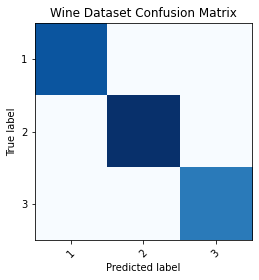

In [17]:
cm = confusion_matrix(y_test, y_lr)

tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)
plt.tight_layout
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Wine Dataset Confusion Matrix')
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.show()

### Accuracy Precision Recall and F-Score

In [18]:
accuracy = accuracy_score(y_test, y_lr)
print('Model accuracy : ', accuracy)

metric_score = precision_recall_fscore_support(y_test, y_lr, average='macro')

metric_name = ['precision', 'recall', 'fscore']

for i in range(0, 3):
    print('Model ' + metric_name[i] + ' : ' + str(metric_score[i]))

Model accuracy :  1.0
Model precision : 1.0
Model recall : 1.0
Model fscore : 1.0


## Error and Metrics for KMeans

### For K Means clustering, we can't use metrics like accuracy and precision because the model doesn't have any knowledge of the actual classes

### Instead, we use metrics like Completeness, Homogeneity and V Measure Score

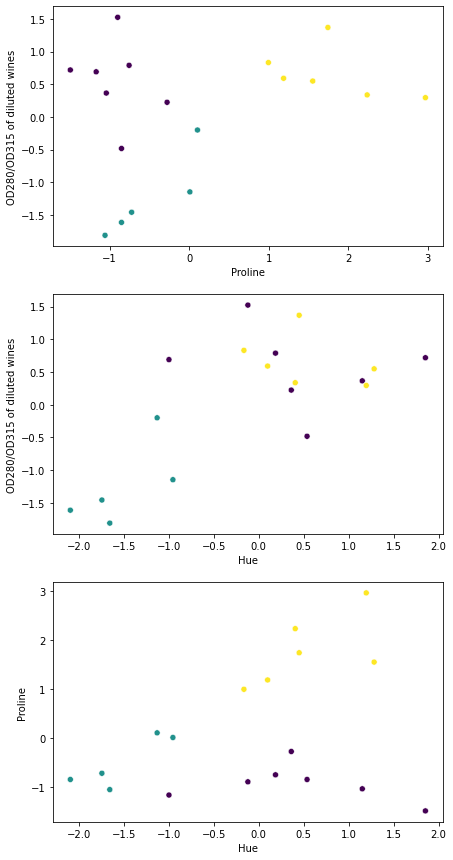

In [30]:
fig, axs = plt.subplots(nrows=3)
fig.set_size_inches(7, 15)

p1 = sns.scatterplot(x = x_test['Proline'], y = x_test['OD280/OD315 of diluted wines'], 
                     data=x_test, c=y_predicted, ax=axs[0])
p2 = sns.scatterplot(x = x_test['Hue'], y = x_test['OD280/OD315 of diluted wines'], 
                     data=x_test, c=y_predicted, ax=axs[1])
p3 = sns.scatterplot(x = x_test['Hue'], y = x_test['Proline'], c=y_predicted, 
                     data=x_test, ax=axs[2])

plt.show()

### Completeness, Homogeneity and V Measure Score

In [20]:
c_score = completeness_score(y_test, y_predicted)
print('Model Completeness Score : ', c_score)

h_score = homogeneity_score(y_test, y_predicted)
print('Model Homogeneity Score : ', h_score)

v_score = v_measure_score(y_test, y_predicted)
print('Model V-Measure Score : ', v_score)

Model Completeness Score :  1.0
Model Homogeneity Score :  1.0
Model V-Measure Score :  1.0
